In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import os

bear - 125

bird - 137

cat - 123

cow - 131

deer - 127

dog - 122

dolphin - 129

Elephant - 133

giraffe- 129

horse- 130

kangaroo - 126

lion - 131

panda - 135

tiger - 129

zebra - 137

In [3]:
dol = os.listdir('/content/drive/MyDrive/dataset/Dolphin')
print(dol[0:100])

['Dolphin_16_4.jpg', 'Dolphin_11.jpeg', 'Dolphin_12.jpeg', 'Dolphin_12_2.jpg', 'Dolphin_10_1.jpg', 'Dolphin_13_1.jpg', 'Dolphin_16.jpeg', 'Dolphin_10_4.jpg', 'Dolphin_17_2.jpg', 'Dolphin_17_3.jpg', 'Dolphin_15.jpeg', 'Dolphin_16_3.jpg', 'Dolphin_14_3.jpg', 'Dolphin_11_2.jpg', 'Dolphin_15_4.jpg', 'Dolphin_1.jpg', 'Dolphin_10.jpg', 'Dolphin_15_3.jpg', 'Dolphin_10_3.jpg', 'Dolphin_13_3.jpg', 'Dolphin_14_1.jpg', 'Dolphin_17.jpeg', 'Dolphin_18_1.jpg', 'Dolphin_17_1.jpg', 'Dolphin_14_2.jpg', 'Dolphin_15_2.jpg', 'Dolphin_16_1.jpg', 'Dolphin_10_2.jpg', 'Dolphin_12_1.jpg', 'Dolphin_13_2.jpg', 'Dolphin_13.jpeg', 'Dolphin_15_1.jpg', 'Dolphin_16_2.jpg', 'Dolphin_11_3.jpg', 'Dolphin_11_1.jpg', 'Dolphin_28_4.jpg', 'Dolphin_25_1.jpg', 'Dolphin_22_4.jpg', 'Dolphin_23.jpeg', 'Dolphin_19.jpeg', 'Dolphin_21.jpeg', 'Dolphin_18_3.jpg', 'Dolphin_14.jpeg', 'Dolphin_18_4.jpg', 'Dolphin_22_3.jpg', 'Dolphin_27.jpeg', 'Dolphin_22_2.jpg', 'Dolphin_23_2.jpg', 'Dolphin_22_1.jpg', 'Dolphin_25_2.jpg', 'Dolphin_23_4.j

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

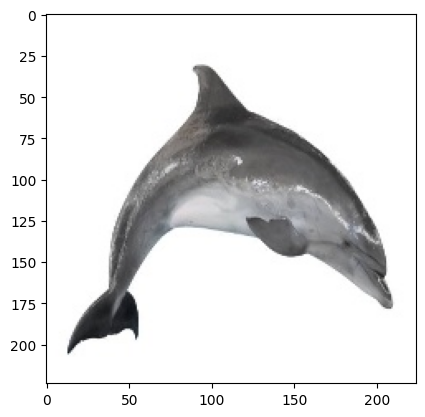

(224, 224, 3)

In [5]:
img = mpimg.imread('/content/drive/MyDrive/dataset/Dolphin/Dolphin_5.jpg')
plt.imshow(img)
plt.show()
img.shape

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models, callbacks
import tensorflow as tf

In [7]:
# Dataset path and classes
base_path = '/content/drive/MyDrive/dataset/'  # Update with your dataset path
classes = ["Bear", "Bird", "Cat", "Cow", "Deer", "Dog", "Dolphin", "Elephant",
           "Giraffe", "Horse", "Kangaroo", "Lion", "Panda", "Tiger", "Zebra"]

In [8]:
# Set up data generators for real-time data loading and augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Splits the dataset into 80% train and 20% validation
)

In [9]:
train_generator = train_datagen.flow_from_directory(
    directory=base_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='training'
)

Found 1561 images belonging to 15 classes.


In [10]:
validation_generator = train_datagen.flow_from_directory(
    directory=base_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)

Found 383 images belonging to 15 classes.


In [11]:
# Define the model using ResNet50 as the base
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers[-10:]:  # Unfreeze the last 10 layers for fine-tuning
    layer.trainable = True

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [12]:
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(len(classes), activation='softmax')
])

In [13]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# Define callbacks
lr_schedule = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [15]:
# Train the model with the generators
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    callbacks=[lr_schedule, early_stopping]
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


49/49 ━━━━━━━━━━━━━━━━━━━━ 1370s 23s/step - accuracy: 0.1906 - loss: 2.7233 - val_accuracy: 0.0705 - val_loss: 3.6082 - learning_rate: 1.0000e-04
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 35s 632ms/step - accuracy: 0.5339 - loss: 1.5576 - val_accuracy: 0.0627 - val_loss: 3.4093 - learning_rate: 1.0000e-04
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 636ms/step - accuracy: 0.7220 - loss: 1.1050 - val_accuracy: 0.0862 - val_loss: 2.9714 - learning_rate: 1.0000e-04
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 40s 643ms/step - accuracy: 0.8026 - loss: 0.8716 - val_accuracy: 0.0705 - val_loss: 3.0480 - learning_rate: 1.0000e-04
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 45s 733ms/step - accuracy: 0.8566 - loss: 0.7123 - val_accuracy: 0.0992 - val_loss: 2.9641 - learning_rate: 1.0000e-04
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 34s 639ms/step - accuracy: 0.9142 - loss: 0.5612 - val_accuracy: 0.1567 - val_loss: 2.7949 - learning_rate: 1.0000e-04
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 35s 631ms/step - accuracy: 0.92

In [16]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 435ms/step - accuracy: 0.9113 - loss: 0.3198
Loss:  0.28810980916023254
Accuracy:  0.9216710329055786


In [17]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

Path of the image to be predicted/content/download.jpeg


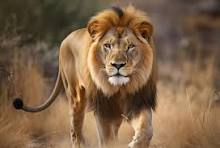

(148, 220, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
[[0.00430242 0.00170359 0.00750433 0.00477864 0.00208238 0.00749885
  0.00380683 0.00610274 0.00374204 0.00276996 0.00843002 0.9173409
  0.02140992 0.00732528 0.00120209]]
The image is recognized as Lion


In [18]:
input_image_path = input('Path of the image to be predicted')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
print(input_image.shape)
image_resized = cv2.resize(input_image,(224,224))
image_resized = image_resized/255
image_reshaped = np.reshape(image_resized,[1,224,224,3])
prediction = model.predict(image_reshaped)
print(prediction)
pred_label = np.argmax(prediction)
classes = ["Bear", "Bird", "Cat", "Cow", "Deer", "Dog", "Dolphin", "Elephant",
           "Giraffe", "Horse", "Kangaroo", "Lion", "Panda", "Tiger", "Zebra"]
print('The image is recognized as',classes[pred_label])